In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [93]:
df = pd.read_csv('911.csv')

In [94]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [95]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

### Dataset Information

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


### Statistical information (descriptive statistics to quickly understand the distribution)

In [97]:
df.describe()

,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


### Data Preparation

In [98]:
type(df['timeStamp'])

pandas.core.series.Series

In [99]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [100]:
df['hour'] = df['timeStamp'].dt.hour

In [101]:
df['hour']

0        17
1        17
2        17
3        17
4        17
         ..
99487    11
99488    11
99489    11
99490    11
99491    11
Name: hour, Length: 99492, dtype: int64

In [123]:
#extracting month , year , day and week
df['day_of_week'] = df['timeStamp'].dt.day_name().str[:3] 
df['month'] = df['timeStamp'].dt.month_name().str[:3]

In [103]:
df['timeStamp'].dt.year.value_counts()

2016    91523
2015     7969
Name: timeStamp, dtype: int64

In [104]:
df['year'] = df['timeStamp'].dt.year

In [ ]:
df.drop(['time'],axis = 1,inplace = True)

In [ ]:
df

### Checking for missing values 

In [106]:
df.isnull().sum()

lat                0
lng                0
desc               0
zip            12855
title              0
timeStamp          0
twp               43
addr             519
e                  0
hour               0
day_of_week        0
month              0
year               0
dtype: int64

#### we can see that address and zip columns have missing values , but the count is not negligible, so it's not safe to drop rows . I am going to assign "N/A " to those values

In [107]:
df['zip'].fillna('#N/A', inplace = True)
df['twp'].fillna('#N/A' , inplace = True)
df['addr'].fillna('#N/A' , inplace = True)

In [108]:
df.isnull().sum()

lat            0
lng            0
desc           0
zip            0
title          0
timeStamp      0
twp            0
addr           0
e              0
hour           0
day_of_week    0
month          0
year           0
dtype: int64

### Checking for duplicates

In [109]:
df.duplicated().sum()

0

## Basic Analysis

### what are the most common zipcodes for the 911 calls?

In [110]:
df['zip'].value_counts().head()

#N/A       12855
19401.0     6979
19464.0     6643
19403.0     4854
19446.0     4748
Name: zip, dtype: int64

#### Insight :  If we notice here , the highest number of calls are from an unknown zipcode, following can be the possible reasons:

##### i) Users not being able to provide their exact location due to the nature of their emergency / they might be unsure of the zipcodes.
##### ii) The second possibility can be, incomplete data recording due to several reasons like privacy or confidentiality issues .

### What are the most common townships for the 911 calls?

In [111]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

### how many unique titles are there and what are they?

In [112]:
df['title'].nunique()

110

In [113]:
k = pd.DataFrame({'Unique Titles':df['title'].unique()})
k

,Unique Titles
0,EMS: BACK PAINS/INJURY
1,EMS: DIABETIC EMERGENCY
2,Fire: GAS-ODOR/LEAK
3,EMS: CARDIAC EMERGENCY
4,EMS: DIZZINESS
...,...
105,EMS: BOMB DEVICE FOUND
106,Fire: SYNCOPAL EPISODE
107,EMS: INDUSTRIAL ACCIDENT
108,EMS: DROWNING


### What are the most common reasons for the emergency calls?

In [114]:
df['Reason'] = df['title'].apply(lambda title : title.split(':')[0])

In [115]:
df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

In [116]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

### Based on address

In [117]:
calls_by_address = df['addr'].value_counts()
calls_by_address

SHANNONDELL DR & SHANNONDELL BLVD      938
#N/A                                   519
MAIN ST & OLD SUMNEYTOWN PIKE          390
THE FAIRWAY  & RYDAL RD                260
GULPH RD & KIRK AVE                    235
                                      ... 
CREEKVIEW DR & OLD PENLLYN PIKE          1
OLD GULPH RD & MONTGOMERY SCHOOL LN      1
ROMANO DR & BELVOIR RD                   1
CHERRY LN & RYDAL RD                     1
PARK DR & N ADAMS ST                     1
Name: addr, Length: 21915, dtype: int64

In [118]:
df['addr'].value_counts().head(3)

SHANNONDELL DR & SHANNONDELL BLVD    938
#N/A                                 519
MAIN ST & OLD SUMNEYTOWN PIKE        390
Name: addr, dtype: int64

## Time-based analysis

### Count of calls by month

In [241]:
calls_per_month = df.groupby('month').count()['lat']
calls_per_month

month
Apr    11326
Aug     9078
Dec     7969
Feb    11467
Jan    13205
Jul    12137
Jun    11786
Mar    11101
May    11423
Name: lat, dtype: int64

In [240]:
calls_per_day = df.groupby('day_of_week').count()['lat']
calls_per_day

day_of_week
Fri    14833
Mon    14680
Sat    13336
Sun    12136
Thu    14478
Tue    15150
Wed    14879
Name: lat, dtype: int64

In [239]:
calls_by_date = df.groupby('Date').count()['lat']

calls_by_date

Date
2015-12-10    115
2015-12-11    396
2015-12-12    403
2015-12-13    319
2015-12-14    447
             ... 
2016-08-20    328
2016-08-21    357
2016-08-22    389
2016-08-23    439
2016-08-24    132
Name: lat, Length: 259, dtype: int64

###

# Visualization

###

Text(0.5, 1.0, 'Emergency calls by Reason')

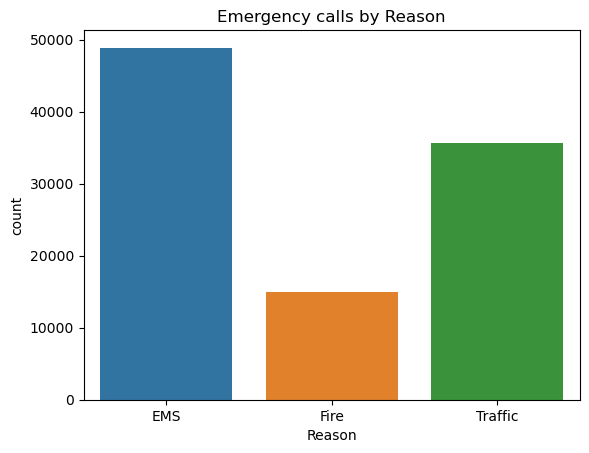

In [121]:
sns.countplot(x = 'Reason', data = df)
plt.title('Emergency calls by Reason')

### Emergency calls by day of the week , based on the reason for the calls.

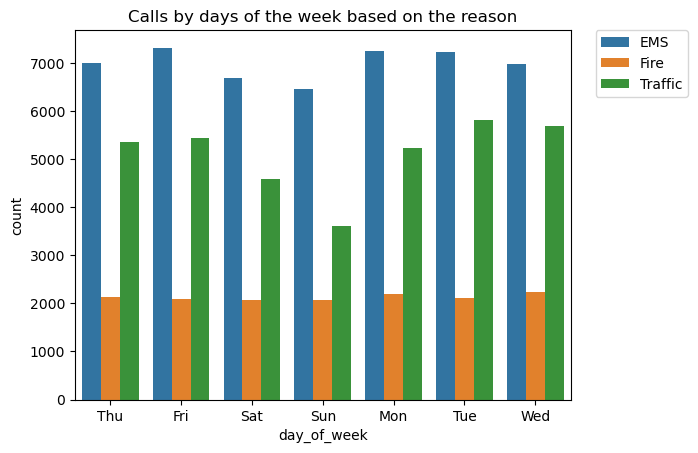

In [129]:
sns.countplot(x = 'day_of_week',data=df,hue='Reason')
plt.title('Calls by days of the week based on the reason')

# To put the legend outside:

plt.legend(bbox_to_anchor = (1.05,1), loc = 2, borderaxespad=0.)

### Calls the month based on the reason

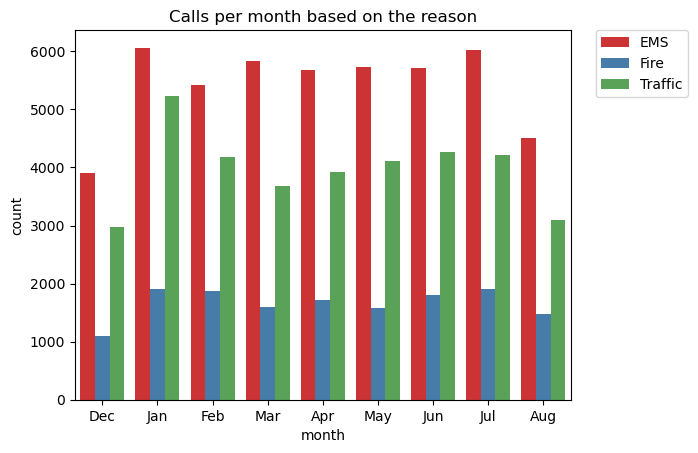

In [199]:
sns.countplot(x = 'month',data=df,hue='Reason', palette='Set1')
plt.title('Calls per month based on the reason')

# To put the legend outside:

plt.legend(bbox_to_anchor = (1.05,1), loc = 2, borderaxespad=0.)

In [132]:
# You can do this if you haven't yet dealt with missing values.

byMonth = df.groupby('month').count()

In [134]:
byMonth.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,hour,day_of_week,year,Reason
month,,,,,,,,,,,,,
Apr,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326
Aug,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078
Dec,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969
Feb,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467
Jan,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205
Jul,12137,12137,12137,12137,12137,12137,12137,12137,12137,12137,12137,12137,12137
Jun,11786,11786,11786,11786,11786,11786,11786,11786,11786,11786,11786,11786,11786
Mar,11101,11101,11101,11101,11101,11101,11101,11101,11101,11101,11101,11101,11101
May,11423,11423,11423,11423,11423,11423,11423,11423,11423,11423,11423,11423,11423


In [163]:
byMonth.sort_values('month',kind='mergesort')

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,hour,day_of_week,year,Reason
month,,,,,,,,,,,,,
Apr,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326
Aug,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078
Dec,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969
Feb,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467
Jan,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205
Jul,12137,12137,12137,12137,12137,12137,12137,12137,12137,12137,12137,12137,12137
Jun,11786,11786,11786,11786,11786,11786,11786,11786,11786,11786,11786,11786,11786
Mar,11101,11101,11101,11101,11101,11101,11101,11101,11101,11101,11101,11101,11101
May,11423,11423,11423,11423,11423,11423,11423,11423,11423,11423,11423,11423,11423


### Compare years based on number of calls 

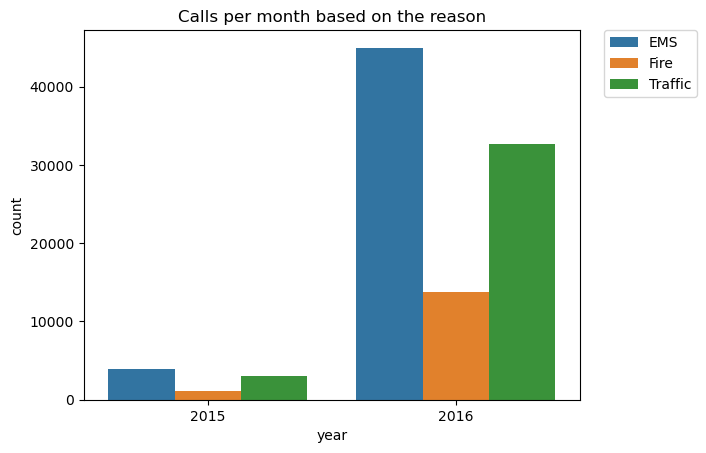

In [164]:
sns.countplot(x = 'year',data=df,hue='Reason')
plt.title('Calls per month based on the reason')

# To put the legend outside:

plt.legend(bbox_to_anchor = (1.05,1), loc = 2, borderaxespad=0.)

In [165]:
#This is for my understanding, you can ignore .
pivot = df.pivot_table(index = ['year','month'],
                       values =['Reason'],
                       aggfunc ='count')
pivot

Reason
year month        
2015 Dec      7969
2016 Apr     11326
     Aug      9078
     Feb     11467
     Jan     13205
     Jul     12137
     Jun     11786
     Mar     11101
     May     11423

### Identify the most common addresses in the most common zip codes ( you can consider top 3 addresses from each of top 5 zip codes)

In [187]:
top_addresses = df.groupby('zip')['addr'].value_counts().groupby(level=0).head(3).reset_index(name='count')

In [188]:
top_addresses

,zip,addr,count
0,17752.0,MAIN,1
1,18036.0,MILL HILL RD & ORCHARD RD,1
2,18036.0,ORCHARD RD & SCHOOL HOUSE LN,1
3,18041.0,MAIN ST & CHURCH ST,79
4,18041.0,BLOMMER DR & GRAVEL PIKE,23
...,...,...,...
280,36107.0,600,1
281,77316.0,8931,1
282,#N/A,#N/A,472
283,#N/A,SCHUYLKILL EXPY & WEADLEY RD OVERPASS,199


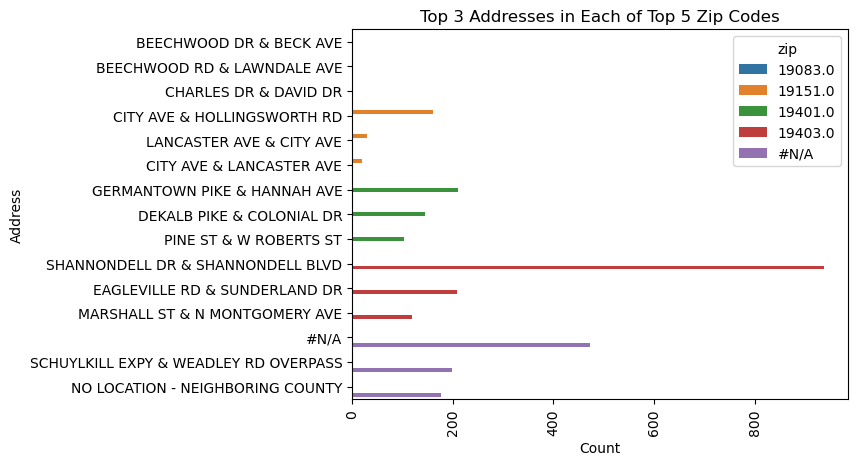

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtering the top 5 zip codes
top_zipcodes = top_addresses['zip'].value_counts().nlargest(5).index
filtered_addresses = top_addresses[top_addresses['zip'].isin(top_zipcodes)]

# Creating a bar plot of the top addresses for each zip code
sns.barplot(x='count', y='addr', hue='zip', data=filtered_addresses)


# Set the title and labels
plt.title('Top 3 Addresses in Each of Top 5 Zip Codes')
plt.xlabel('Count')
plt.ylabel('Address')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=90)


plt.show()


### Identifying the common calling hours for days in a week 

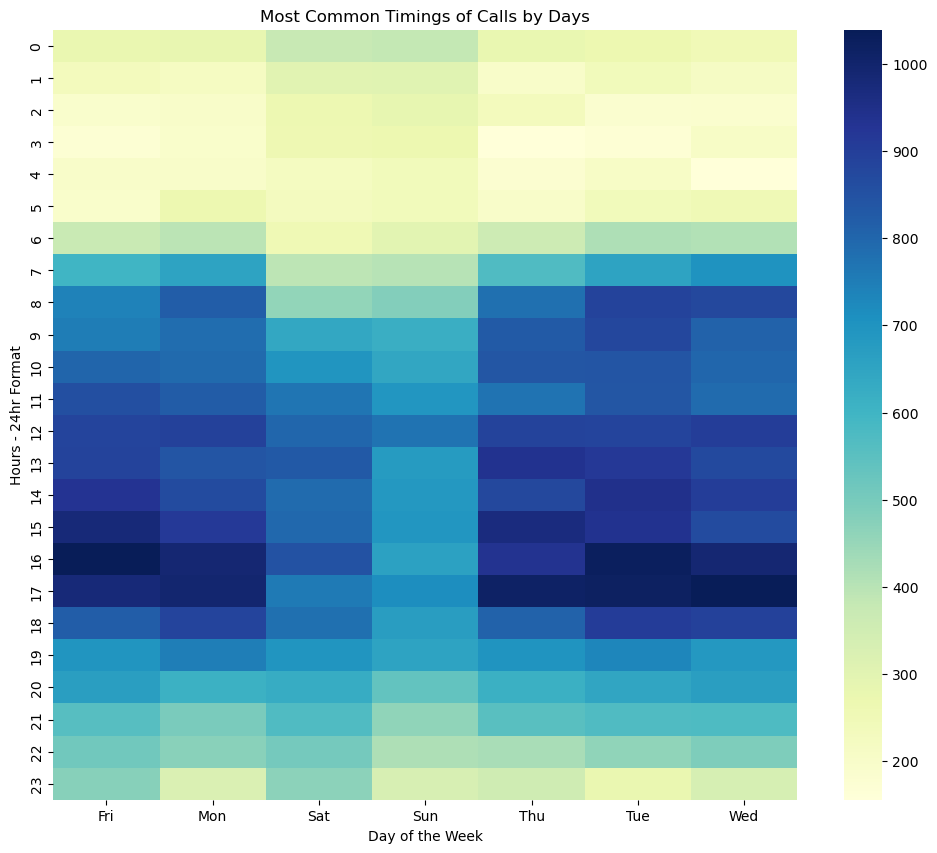

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the hour component from the 'timeStamp' column


# Group the data by day of the week and hour, and count the occurrences
hourly_counts = df.groupby(['day_of_week', 'hour']).size().reset_index(name='count')

# Pivot the data to create a heatmap
heatmap_data = hourly_counts.pivot(index = 'hour', columns = 'day_of_week', values= 'count')

# Create a heatmap plot
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, cmap='YlGnBu')

# Set the title and labels
plt.title('Most Common Timings of Calls by Days')
plt.xlabel('Day of the Week')
plt.ylabel('Hours - 24hr Format')

# Display the plot
plt.show()


#### From the above heatmap, we can see that , most of the calls occured during hrs 15,16 and 17 which is around 3pm to 6pm roughly and most commonly on Monday, Tuesday, Wednesday and Friday.

#### From this, we can know peak call times, determine the call traffic during day time ..evening and night hrs based on patterns which can be affected by various factors like.. weather , power, or accurrance of any illegal events , etc.

### Identifying the common calling hours for the top 5 locations

In [211]:
top_addresses = df['addr'].value_counts().head(5).index

filtered_df = df[df['addr'].isin(top_addresses)]

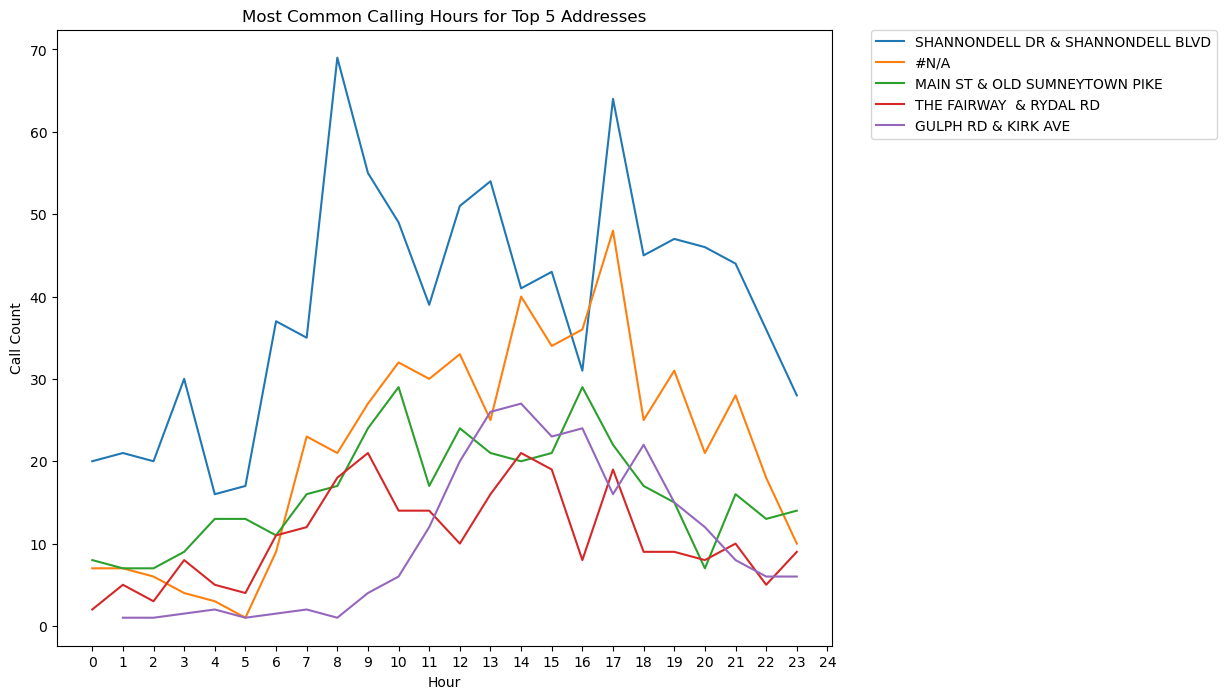

In [224]:
hourly_counts = filtered_df.groupby(['addr', 'hour']).size().reset_index(name='count')
plt.figure(figsize=(10, 8)) 
for address in top_addresses:
    address_data = hourly_counts[hourly_counts['addr'] == address]
    sns.lineplot(x='hour', y='count', data=address_data, label=address)

plt.title('Most Common Calling Hours for Top 5 Addresses')
plt.xlabel('Hour')
plt.ylabel('Call Count')
plt.xticks(range(25))



plt.legend(bbox_to_anchor = (1.05,1), loc = 2, borderaxespad=0.)

### Identifying no. of calls by dates 

In [227]:
df['Date'] = df['timeStamp'].apply(lambda t : t.date())
df.groupby('Date').count()['lat']

Date
2015-12-10    115
2015-12-11    396
2015-12-12    403
2015-12-13    319
2015-12-14    447
             ... 
2016-08-20    328
2016-08-21    357
2016-08-22    389
2016-08-23    439
2016-08-24    132
Name: lat, Length: 259, dtype: int64

### Identifying no. of calls by dates , based on each category of reasons.

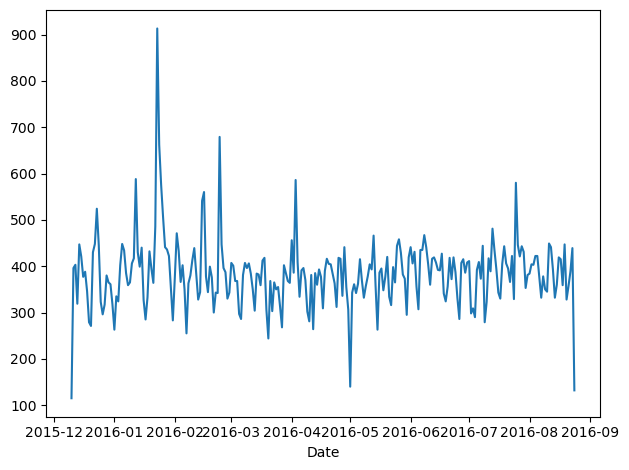

In [229]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

Text(0.5, 1.0, 'Calls vs Dates with "Traffic" as a reason')

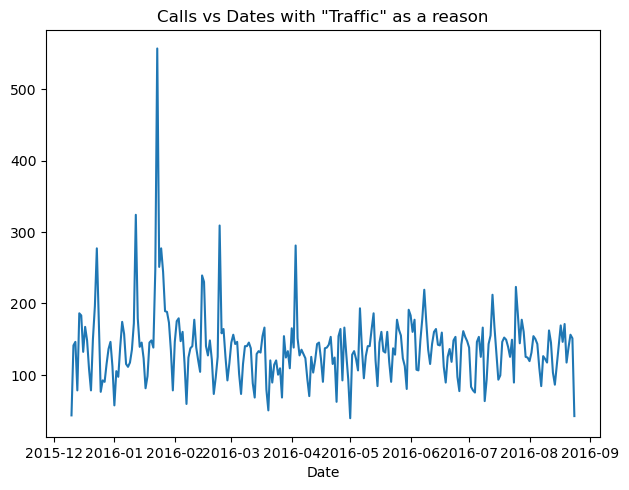

In [234]:
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.tight_layout()
plt.title('Calls vs Dates with "Traffic" as a reason')

Text(0.5, 1.0, 'Calls vs Dates with "EMS" as a reason')

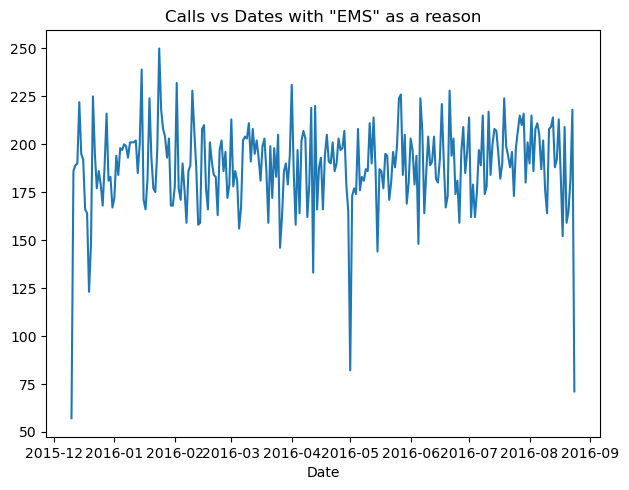

In [235]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.tight_layout()
plt.title('Calls vs Dates with "EMS" as a reason')

Text(0.5, 1.0, 'Calls vs Dates with "Fire" as a reason')

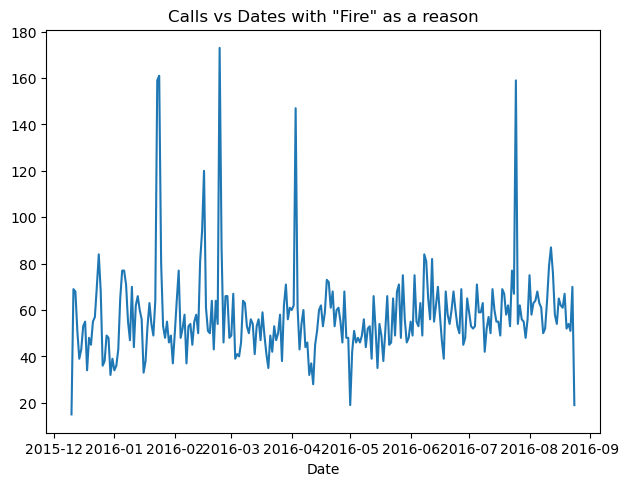

In [236]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.tight_layout()
plt.title('Calls vs Dates with "Fire" as a reason')

### Thanks for taking out your precious time to go through my analysis ! 

### You came till the end which means you are a data science enthusiast like me ! Happy exploring :)